In [2]:
!pip install vk_api
!pip install networkx
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.9 MB/s eta 0:00:00


In [4]:
import vk_api
import time
import json

# Получение токена VK API
token = 'ТОКЕН'
vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api()

# Функция для получения списка друзей пользователя с ограничением времени на запрос и количеством друзей
def get_friends(user_id):
    try:
        start_time = time.time()
        friends = vk.friends.get(user_id=user_id, fields='nickname', count=100)
        if time.time() - start_time > 3:
            raise TimeoutError("Request took longer than 3 seconds")
        return friends['items']
    except (vk_api.exceptions.VkApiError, TimeoutError) as e:
        print(f"Error getting friends for user {user_id}: {e}")
        return []

# Список ID целевых пользователей
target_user_ids = [172350665, 229180632, 145195585, 193887357, 386272361, 204720239, 162225997, 860446539,
                   472133870, 195614586, 825545292, 750743366, 637593527, 299106540, 164679738, 101098087,
                                      239666833, 342040017, 205762499, 165171730, 270780454, 155290829, 151413977, 62269831,
                                                         253407490, 192574298, 144399122, 419376445, 508644412, 396854328]

# Список для хранения всех пользователей и их друзей
friendships = []

# Получение информации о друзьях для каждого пользователя и проверка связей между друзьями
for user_id in target_user_ids:
    friends = get_friends(user_id)
    user_friend_ids = [friend['id'] for friend in friends]

    # Добавляем связь между пользователем и его друзьями
    for friend_id in user_friend_ids:
        friendships.append((user_id, friend_id))

        # Получаем друзей каждого друга
        friend_friends = get_friends(friend_id)
        friend_friend_ids = [f['id'] for f in friend_friends]

        # Проверка дружбы между друзьями
        for i, f1_id in enumerate(friend_friend_ids):
            for f2_id in friend_friend_ids[i + 1:]:
                # Проверка, есть ли связь между двумя друзьями
                if f2_id in user_friend_ids and (f1_id, f2_id) not in friendships and (f2_id, f1_id) not in friendships:
                    friendships.append((f1_id, f2_id))

# Список связей в файл JSON
with open('friends_data.json', 'w') as f:
    json.dump(friendships, f)

print("Данные друзей успешно сохранены в 'friends_data.json'")


Error getting friends for user 51911288: [30] This profile is private
Error getting friends for user 58410032: [30] This profile is private
Error getting friends for user 59538294: [30] This profile is private
Error getting friends for user 73989913: [30] This profile is private
Error getting friends for user 116543501: [30] This profile is private
Error getting friends for user 143253371: [30] This profile is private
Error getting friends for user 143579152: [30] This profile is private
Error getting friends for user 156241172: [30] This profile is private
Error getting friends for user 157841304: [30] This profile is private
Error getting friends for user 159813255: [30] This profile is private
Error getting friends for user 160096443: [30] This profile is private
Error getting friends for user 163549843: [30] This profile is private
Error getting friends for user 178937702: [30] This profile is private
Error getting friends for user 182278035: [30] This profile is private
Error gett

Количество рёбер: 290103
Количество вершин: 43750


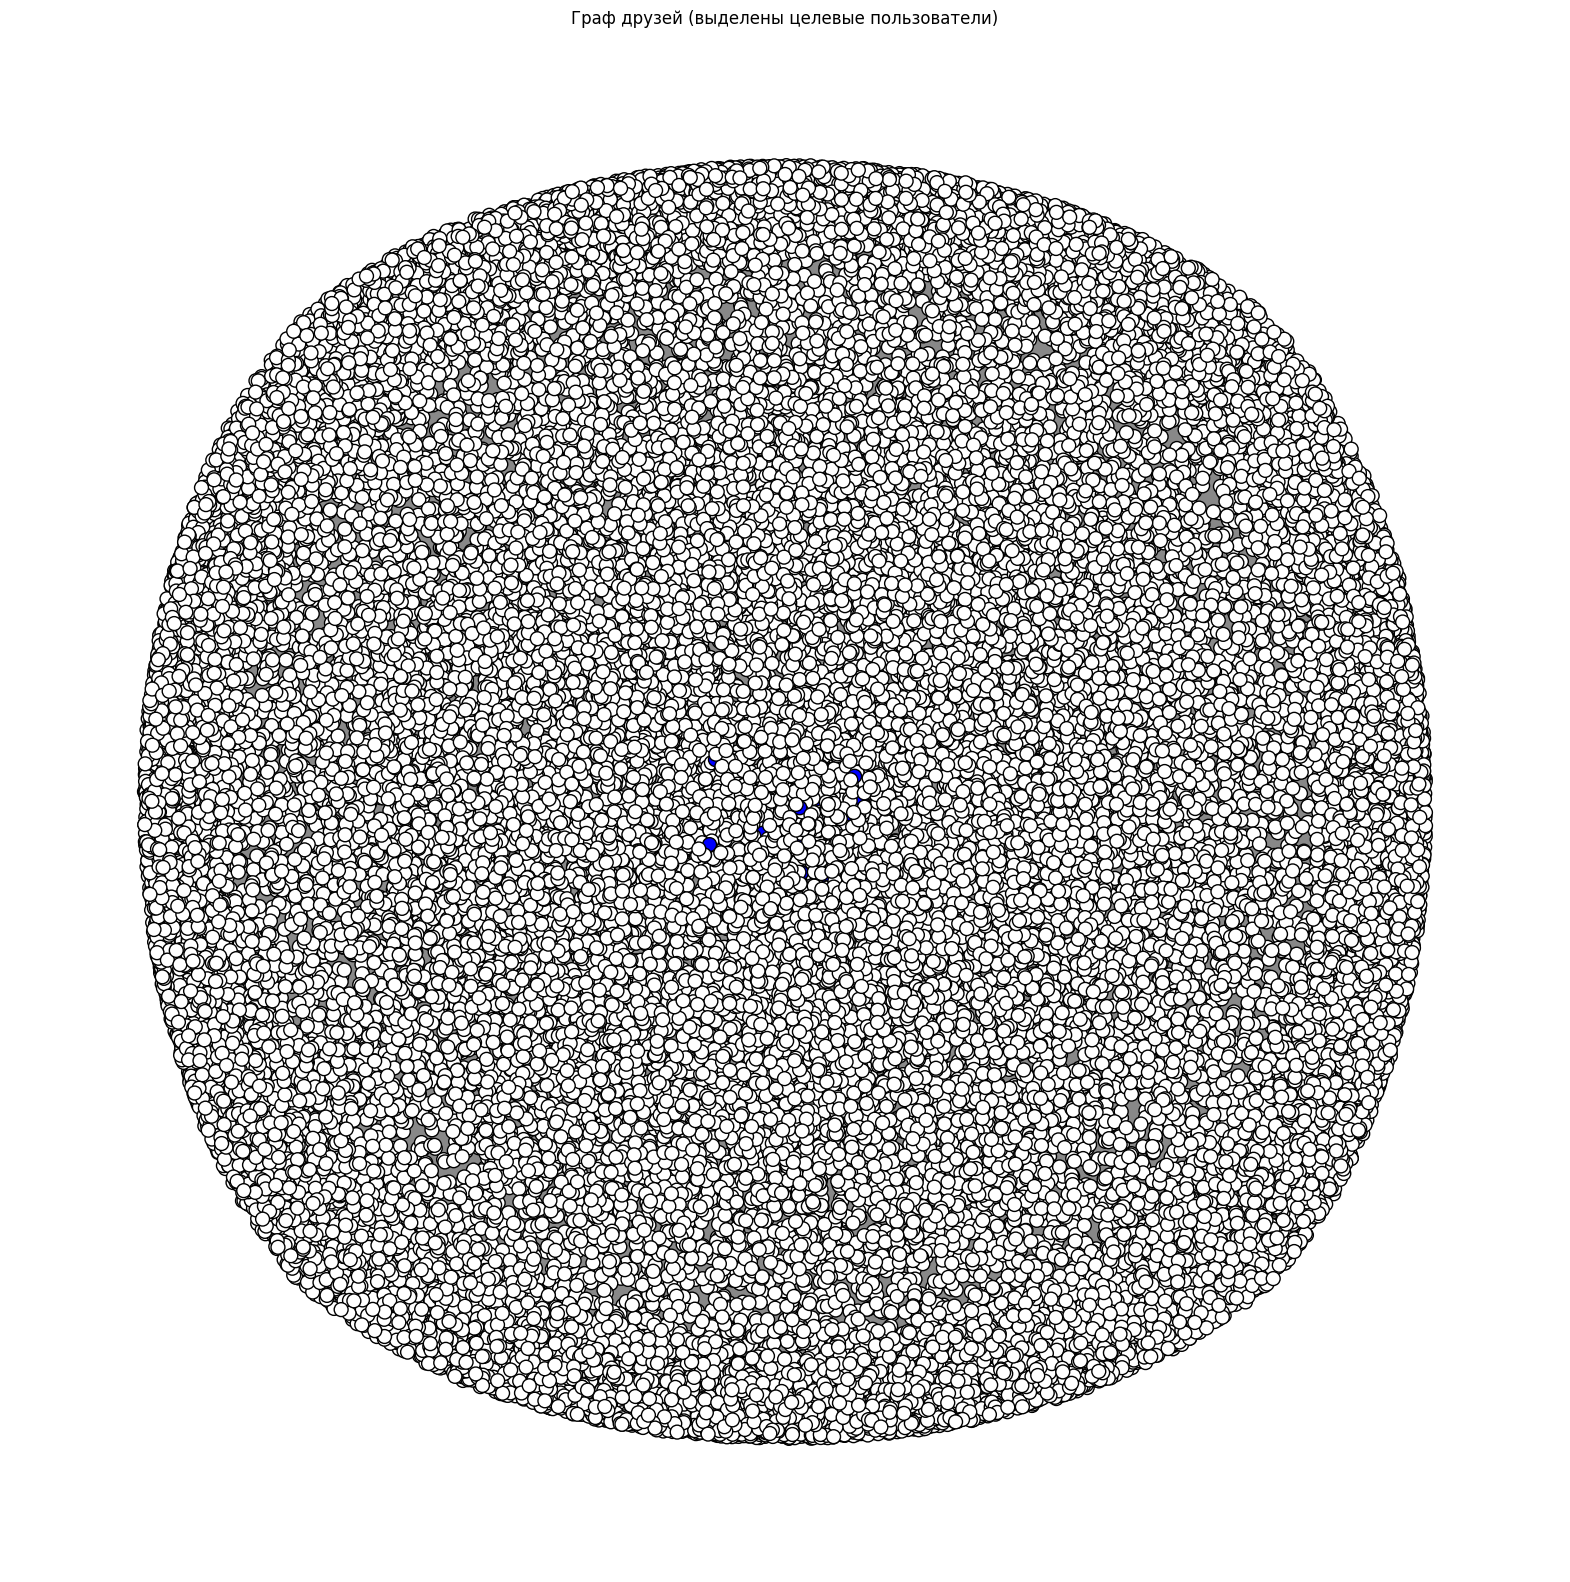

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import json

# Загрузка данных из файла
with open('friends_data.json', 'r') as f:
    friendships = json.load(f)

# Построение графа
G = nx.Graph()
G.add_edges_from(friendships)


nodes_to_remove = [node for node in G.nodes() if G.degree(node) < 2]
G.remove_nodes_from(nodes_to_remove)


num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
print(f"Количество рёбер: {num_edges}")
print(f"Количество вершин: {num_nodes}")

betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G)


pos = nx.spring_layout(G, seed=42, k=0.15)

target_user_ids = [172350665, 229180632, 145195585, 193887357, 386272361, 204720239, 162225997, 860446539,
                   472133870, 195614586, 825545292, 750743366, 637593527, 299106540, 164679738, 101098087,
                                      239666833, 342040017, 205762499, 165171730, 270780454, 155290829, 151413977, 62269831,
                                                         253407490, 192574298, 144399122, 419376445, 508644412, 396854328]
node_colors = ['blue' if node in target_user_ids else 'white' for node in G.nodes()]

plt.figure(figsize=(20, 20))
nx.draw_networkx_edges(G, pos, edge_color='#888', width=0.5)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100, edgecolors='black')

plt.title('Граф друзей (выделены целевые пользователи)')
plt.axis('off')
plt.show()


In [5]:
import vk_api
import json
import time
import networkx as nx

# Получение токена VK API
token = 'ТОКЕН'
vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api()

# Список ID целевых пользователей
target_user_ids = [172350665, 229180632, 145195585, 193887357, 386272361, 204720239, 162225997, 860446539,
                   472133870, 195614586, 825545292, 750743366, 637593527, 299106540, 164679738, 101098087,
                                      239666833, 342040017, 205762499, 165171730, 270780454, 155290829, 151413977, 62269831,
                                                         253407490, 192574298, 144399122, 419376445, 508644412, 396854328]

# Получение имен пользователей
user_names = {}
for user_id in target_user_ids:
    try:
        user_info = vk.users.get(user_ids=user_id)[0]
        full_name = f"{user_info['first_name']} {user_info['last_name']}"
        user_names[user_id] = full_name
        time.sleep(0.34)
    except vk_api.exceptions.VkApiError as e:
        print(f"Error fetching user info for {user_id}: {e}")


with open('user_names.json', 'w') as f:
    json.dump(user_names, f)

print("Имена пользователей успешно сохранены в 'user_names.json'")



# Загрузка данных
with open('friends_data.json', 'r') as f:
    friendships = json.load(f)

with open('user_names.json', 'r') as f:
    user_names = json.load(f)


target_user_ids = set(int(user_id) for user_id in user_names.keys())

# Инициализация графа
G = nx.Graph()
G.add_edges_from(friendships)


nodes_to_remove = [node for node in G.nodes() if G.degree(node) < 2]
G.remove_nodes_from(nodes_to_remove)

# Оценка центральности
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G)

# Сортировка пользователей
def sorted_centrality(centrality_dict):
    return sorted(
        ((user, centrality_dict[user]) for user in target_user_ids if user in centrality_dict),
        key=lambda x: x[1],
        reverse=True
    )

# Вывод оценки центральностей (по убыванию)
print("\nЦентральность по посредничеству (betweenness):")
for user, centrality in sorted_centrality(betweenness):
    name = user_names.get(str(user), f"User ID: {user}")
    print(f"{name}, Betweenness: {centrality:.4f}")

print("\nЦентральность по близости (closeness):")
for user, centrality in sorted_centrality(closeness):
    name = user_names.get(str(user), f"User ID: {user}")
    print(f"{name}, Closeness: {centrality:.4f}")

print("\nСобственная центральность (eigenvector):")
for user, centrality in sorted_centrality(eigenvector):
    name = user_names.get(str(user), f"User ID: {user}")
    print(f"{name}, Eigenvector: {centrality:.4f}")


Имена пользователей успешно сохранены в 'user_names.json'

Центральность по посредничеству (betweenness):
Даниил Белов, Betweenness: 0.0553
Александр Краснов, Betweenness: 0.0386
Владислав Утц, Betweenness: 0.0362
Екатерина Беликова, Betweenness: 0.0276
Никита Гусев, Betweenness: 0.0207
Денис Яценко, Betweenness: 0.0174
Кирилл Кузьмин, Betweenness: 0.0171
Danil Egorkin, Betweenness: 0.0152
Маргарита Моругова, Betweenness: 0.0138
Никита Цыганков, Betweenness: 0.0129
Виктория Мезенцева, Betweenness: 0.0099
Мария Денисова, Betweenness: 0.0080
Даниил Алабужев, Betweenness: 0.0078
Nikonov Ivan, Betweenness: 0.0075
Рахман Кичибеков, Betweenness: 0.0060
Мария Чиркова, Betweenness: 0.0055
Влад Лавренов, Betweenness: 0.0053
Максим Поздняков, Betweenness: 0.0049
Аня Хоборова, Betweenness: 0.0034
Вася Елизаветов, Betweenness: 0.0032
Татьяна Латынова, Betweenness: 0.0030
ආර්ටියෝම් ඉස්මයිලොව්, Betweenness: 0.0023
Антон Филиппов, Betweenness: 0.0017
Человек Без-Имени, Betweenness: 0.0016
Дима Балаба